# Исследование объявлений о продаже квартир


    

Целью проекта является установление параметров зависимости рыночной стоимости недвижимости для построения автоматизированной системы на основе данных сервиса Яндекc Недвижимость (архива объявлений по г. Санкт-Петербургу и других населенных пунктов за несколько лет).
    Для начала мы изучим датасет, проведем предобработку данных - установим наличие пропущенных значений и заменим их на логически подходящие, при необходимости изменим тип данных, проверим наличие дубликатов. Далее в соответствии с условиями задачи дополним таблицу такими параметрами как цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры; соотношение жилой и общей площади, а также отношение площади кухни к общей, проведем категоризацию данных по этажности. Далее изучим данные о площади, цене, числе комнат, высоте потолков, этажности, расстоянии до центра. Избавимся от аномальных и выбивающихся значений. Установим влияние указанных параметров на цену квартир. Отдельно рассмотрим информацию о продажах по 10 населенным пунктам, в которых больше всего размещается объявлений, рассчитаем среднюю цену квадратного метра жилья в них.Также отдельно изучим зависимость цены квартиры от расстояния до центра, найдем "стоимость" жилья на каждый километр, рассмотрим процесс ценообразования в центральной части. Для исследования построим гистограммы, графики, выведем процент корреляции исследуемых параметров. 

## Изучение данных из файла

In [10]:
import pandas as pd


Читаем файл '/datasets/real_estate_data.csv'ets/data.csv' библиотеки pandas и сохраняем в переменной data. 

In [11]:
data = pd.read_csv('C:/Users/User/Downloads/real_estate_data.csv')
print(data.head())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

 Изучением установлено, что колонки в датасете отделены друг от друга  \t.  Чтоб их перевести в формат, удобный для анализа разделим их с помощью параметра sep' ' и выведем на экран первые строки комагдой head().

In [12]:
data = pd.read_csv('C:/Users/User/Downloads/real_estate_data.csv',sep='\t')
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

 Информация переведена в удобный для изучения вид. Общие данные посмотрим вызвав команду info().

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод:  

 Для анализа данных к исходному датасету применили параметр sep' ' и установили, что исходные данные представляют 22 столбца с информацией различного типа.

## Предобработка данных

 Предобработку данных начнем с  поиска пропущенных значений с помощью метода isna().sum(). 

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

 В столбце 'ceiling_height' установлены отсутствующие значения в количестве 9195. Скорее всего люди, давашие объявления не указывали высоту потолка в связи с тем, что не считали данный параметр значимым для потенциальных покупателей. Однако, пропуски в таком количестве нельзя проигнорировать. В этой связи пропуски уместно заполнить медианным значением при помощи метода fillna().   

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

В столбце 'floors_total' имеется 86 пропусков,что составляет менее 1 %. Данные этого столбца предполагается использовать для категоризации этажности продаваемой недвижимости, то есть задействовать в анализе зависимости цены квартиры от ее этажности косвенно. В указанной связи возможно пропуски не обрабатывать ввиду их малой зачимости для анализа.

 В столбцах 'living_area' и 'kitchen_area' имеется по 1903 и 2278 пропусков соответственно. Данные пропуски, скорее всего вызваны тем, что в квартирах-студиях и с открытой планировкой отсутствует формальное разделений жилой площади и кухни. По каждому из указанных столбцов пропуски визуально не превышают 10%, в анализе ценообразования не задействованы, по этому избавляться от них не будем.

 В столбце 'is_apartment' 20924 пропуска. Данные пропуски обусловлены тем, что апартаменты - это отдельная категория недвижимости, характеризующаяся особым статусом, отличным от статуса жилых помещений. В анализе, предложенном условием задачи, данный параметр не задействован и его можно оставить в исходном виде.

В столбце 'balcony' пропуски скорее всего вызваны тем, что в квартирах нет балконов. По условию задачи данные 'parks_around3000', 'parks_nearest','ponds_around3000','ponds_nearest' получены автоматически на основе картографических данных, которые, скорее всего не содержали соответствующей информации. В анализе эти данные не задействованы, их  заменим нулевыми значениями методом fillna().  

In [16]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

В столбце 'locality_name' имеется 49 пропусков, скорее всего это "человеческий фактор" при внесении информации. Значение невелико, но заменим его на 'unknown'.

In [17]:
data['locality_name'] = data['locality_name'].fillna('unknown')

Пропуски в столбцах 'cityCenters_nearest'  и 'airports_nearest' появились возможно ввиду устаревших картографических данных, заполним их медианным значением. 

In [18]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

 В столбце 'days_exposition' 3181 имеется пропуск. С учетом того, что в столбце 'last_price' отсутствуют пропуски, это не может объясняться несостоявшейся сделкой. Скорее всего данные своевременно не внесли. Эти пропуски также заменим медианным значением.

In [19]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

 Еще раз методом isna().sum() контролируем замену пропусков.

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition             0
dtype: int64

 Примененными кодами пропуски заполнены. Далее проверим соответствие типов данных параметрам, необходимым для анализа. 

 В исходных данных в столбце 'first_day_exposition' тип данных о дате объявления сохранены как object. Методом astype() переводим их в тип datetime. 
 

In [21]:
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64')

 В столбце 'days_exposition' данные из float также переводим в цельночисленный тип, поскольку для такой информации десятые и сотые доли неактуальны.

In [22]:
data['days_exposition'] = data['days_exposition'].astype('int')

 Методом duplicated().sum() проверяем наличие дубликатов.

In [23]:
data.duplicated().sum()

0

 Дубликаты отсутствуют.

### Вывод:

 В столбцах 'ceiling_height', 'cityCenters_nearest', 'days_exposition','airports_nearest' пропуски заменены медианными значениями, поскольу данные (кроме 'airports_nearest') задействованы в анализе, проигнорировать их нельзя, а с учетом их общего количества удалять вместе с остальными данными чревато потерей достоверности. В столбцах  'balcony', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' пропуски заменены на нулевые значения, поскольку могут быть вызваны отсутствием объектов как таковых (балконы), либо картографических данных, внесенных автоматически. Пропуски в 'locality_name' заменены на 'unknown' также чтоб не выводить из анализа информативные по другим параметрам строки.  

В столбцах 'first_day_exposition' и 'days_exposition' типы данных из object и float переведены в datetime и int соответственно. Проконтролировано отсутствие дубликатов.

## Расчёты и добавление результатов в таблицу

 В соответствии с условиями задачи вычисляем и добавдяем в исходный датафрейм столбцы, содержащие следующие параметры: цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; соотношение жилой и общей площади, а также отношение площади кухни к общей.


   Стоимость квадратного метра недвижимости в каждом предложении вычисляем путем деления данных столбца 'last_price' на данные столбца 'total_area' и сохраняем в новом столбце 'square_price', которым дополняем data. Методом astype() задаем цельночисленный тип данных.

In [24]:
data['square_price'] = (data['last_price']/data['total_area']).astype('int64')

 С помощью методов dt.weekday, dt.month и dt.year создаем столбцы 'weekday', 'month', 'year' в которых сохранены соответственно день недели, месяц и год публикации объявления.

In [25]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data.loc[:, 'first_day_exposition'].dt.month 
data['year'] = data.loc[:, 'first_day_exposition'].dt.year


   Чтобы установить наличие зависимости между стоимостью квартиры и этажем, на котором она расположена, исходим из того, что потенциальных покупателей часто интересует не расположена ли квартира на первом или последнем этаже. Для оптимизации анализа категоризируем данные столбца 'floor' на варианты — первый, последний, другой. С этой целью создадим функцию floor_group, которой передадим аргументы из столбцов 'floor' и 'floors_total'. Как результаты работы этой функции дополним data новым столбцом 'floor_group'.

In [26]:
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:     
        return 'первый'
    if floor == floors_total: 
        if floors_total != 1: 
            return 'последний'
    else:
        return 'другие' 
data['floor_group'] = data.apply(floor_group, axis=1)
print(data['floor_group'].value_counts())

другие       17446
последний     3336
первый        2917
Name: floor_group, dtype: int64



 Новый столбец 'ratio_living_total_area', в котором сохраняем данные о соотношении в квартирах жилой площади к общей создаем путем деления данных столбца 'living_area' на 'total_area'.   

In [27]:
data['ratio_living_total_area'] = data['living_area']/data['total_area']


 Новый столбец 'ratio_kitchen_total_area', в котором сохраняем данные о соотношении в квартирах площади кухни к общей создаем путем деления данныч столбца 'kitchen_area' на 'total_area'.  

In [28]:
data['ratio_kitchen_total_area'] = data['kitchen_area']/data['total_area']

 Командой info() контролируем реальное создание столбцов.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23699 non-null  int64         
 1   last_price                23699 non-null  float64       
 2   total_area                23699 non-null  float64       
 3   first_day_exposition      23699 non-null  datetime64[ns]
 4   rooms                     23699 non-null  int64         
 5   ceiling_height            23699 non-null  float64       
 6   floors_total              23613 non-null  float64       
 7   living_area               21796 non-null  float64       
 8   floor                     23699 non-null  int64         
 9   is_apartment              2775 non-null   object        
 10  studio                    23699 non-null  bool          
 11  open_plan                 23699 non-null  bool          
 12  kitchen_area      

### Вывод:

 В соответствии с условием задачи в исходный датафрейм добавлены столбцы 'square_price', 'ratio_living_total_area','ratio_kitchen_total_area','floor_group', 
'weekday', 'month','year'.   

## Исследовательский анализ данных

 Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Кроме того, сама по себе цена всей квартиры малоинформативна для установления взаимодависимости от других параметров. В этой связи важнее цена квадратного метра площади, которую мы посчитали и сохранили в столбце 'square_price'. Его также будем исследовать.С этой целью построим гистограммы для каждого из них методом hist(), применим группировку данных, числовое описание. Для оптимизации создадим отдельный датафрейм, который сохраним в переменной w. 

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'last_price'}>],
       [<AxesSubplot:title={'center':'square_price'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>, <AxesSubplot:>]],
      dtype=object)

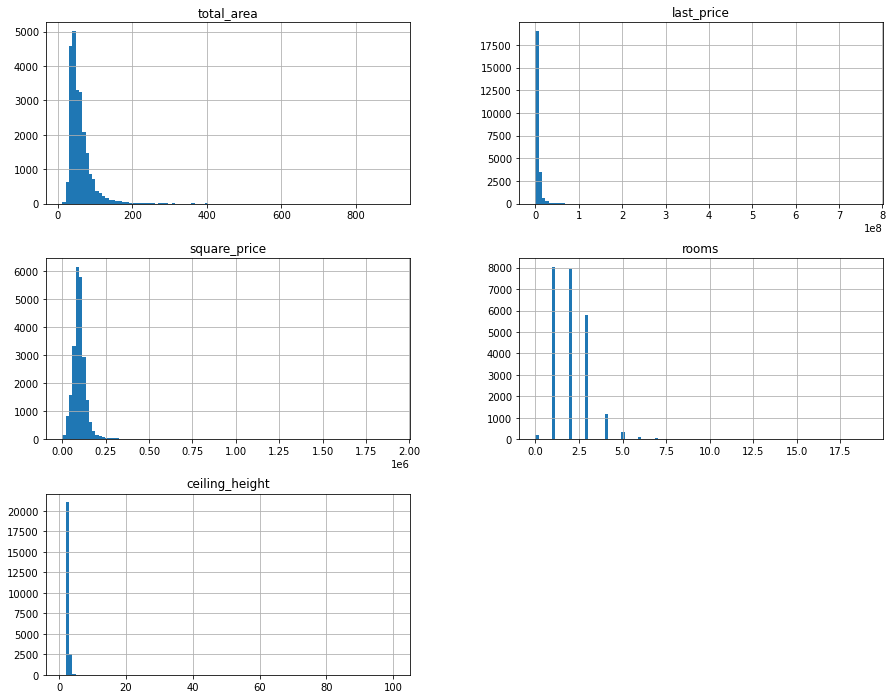

In [30]:
w = data[['total_area','last_price','square_price','rooms','ceiling_height']]
w.hist(bins=100,  figsize=(15, 12))

 Методами groupby() и describe(), примененными к столбцу 'total_area' находим редкие и выбивающиеся значения.

In [31]:
print(data.groupby('total_area')['total_images'].count()) 
data['total_area'].describe()

total_area
12.0     1
13.0     3
13.2     1
14.0     1
15.0     2
        ..
590.0    1
618.0    1
631.0    1
631.2    1
900.0    1
Name: total_images, Length: 2182, dtype: int64


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

 К редким и выбивающимся значениям 'total_area' можно отнести площадь квартиры 900 кв.м. Оно единичное и от него можно избавиться. Минимальное значение 12 кв.м. не является какой-либо аномалией, поскольку на современном рынке жилья малогабаритные квартиры  (менее 20 кв.м.) весьма востребованы и распространены.Избавляемся от аномалии по этому и другим столбцам методом query(), примененном к исходному датафрейму, передав в качестве аргументов условия, исключающие ненужные параметры.

In [32]:
data = data.query('total_area < 900')

 Применяем методы groupby(), describe() к столбцу   'square_price'. 

In [33]:
print(data.groupby('square_price')['total_images'].count())
round(data['square_price'].describe())

square_price
111        1
7962       1
9615       1
10185      1
10368      1
          ..
995983     1
1000748    1
1542604    1
1736842    1
1907500    1
Name: total_images, Length: 14301, dtype: int64


count      23698.0
mean       99406.0
std        50251.0
min          111.0
25%        76584.0
50%        95000.0
75%       114252.0
max      1907500.0
Name: square_price, dtype: float64

Комментарий студента: Группировка данных показала, что цена квадратного метра 111 руб. явно неправдоподобна, а свыше 1000000 - единичные и непоказательные значения, от которых также можно избавиться.

In [34]:
data = data.query('111 < square_price < 1000000')

 Применяем методы groupby(), describe() к столбцу 'last_price'.

In [35]:
print(data.groupby('last_price')['total_images'].count())
round(data['last_price'].describe())

last_price
430000.0       2
440000.0       1
450000.0       4
470000.0       3
480000.0       1
              ..
190870000.0    1
230000000.0    1
240000000.0    1
245000000.0    1
300000000.0    1
Name: total_images, Length: 2972, dtype: int64


count        23693.0
mean       6450201.0
std        8532989.0
min         430000.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      300000000.0
Name: last_price, dtype: float64

 Избавляться от данных не будем, даже от тех, что указывают на цену квартиры выше 100 млн. руб. В крупных мегаполисах такие цены не редкость. 

 Применяем методы groupby(), describe() к столбцу 'rooms'.

In [36]:
print(data.groupby('rooms')['total_images'].count())
data['rooms'].describe()

rooms
0      197
1     8047
2     7938
3     5813
4     1180
5      325
6      105
7       58
8       12
9        8
10       3
11       2
14       2
15       1
16       1
19       1
Name: total_images, dtype: int64


count    23693.000000
mean         2.069852
std          1.075948
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

 Группировка по столбцу 'rooms' показала, что выбивающимися являются значения с числом комнат 0 (183 значения) и 6 и более комнат, которые визуально, даже не прибегая к расчетам составляют не более 2 %. От этих значений можно избавиться.  

In [37]:
data = data.query('0 < rooms < 6')

 Применяем методы groupby(), describe() к столбцу 'ceiling_height'.

In [38]:
print(data.groupby('ceiling_height')['total_images'].count()) 
data['ceiling_height'].describe()

ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      7
27.50      1
32.00      2
100.00     1
Name: total_images, Length: 176, dtype: int64


count    23303.000000
mean         2.720082
std          0.982016
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

 Изучение данных по столбцу 'ceiling_height' показало, что явно аномальными являются значения менее 1.75 (это явно не жилые помещения), а также более 10 метров. Таких значений также немного, их можно удалить.

In [39]:
data = data.query('1.75 <= ceiling_height < 10.00')

 От аномальных и явно выбивающихся значений избавились. Чтоб посмотреть количество оставшихся для анализа строк вызываем метод info().

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23277 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23277 non-null  int64         
 1   last_price                23277 non-null  float64       
 2   total_area                23277 non-null  float64       
 3   first_day_exposition      23277 non-null  datetime64[ns]
 4   rooms                     23277 non-null  int64         
 5   ceiling_height            23277 non-null  float64       
 6   floors_total              23195 non-null  float64       
 7   living_area               21401 non-null  float64       
 8   floor                     23277 non-null  int64         
 9   is_apartment              2745 non-null   object        
 10  studio                    23277 non-null  bool          
 11  open_plan                 23277 non-null  bool          
 12  kitchen_area      

 В исходном датафрейме было 23699 строк. После усереднения данных (удаления аномальных и выбивающихся значений) их стало 22997, то есть исходные данные сократились в пределах 5%, что является нормой.  

 В соответствии с условием задачи изучаем время продажи квартиры. С этой целью также построим гистограмму, диаграмму размаха, применим методы groupby(), describe() к столбцу 'days_exposition'. 


 Методом hist() строим гистограмму.

<AxesSubplot:>

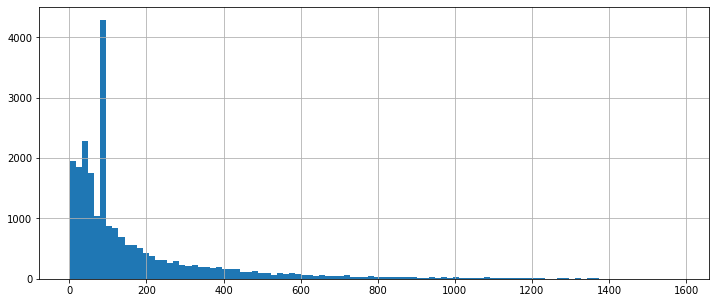

In [41]:
data['days_exposition'].hist(bins=100, figsize=(12, 5))

 Импортируем библиотеку matpotlib и методом boxplot() строим диаграмму размаха.

<AxesSubplot:>

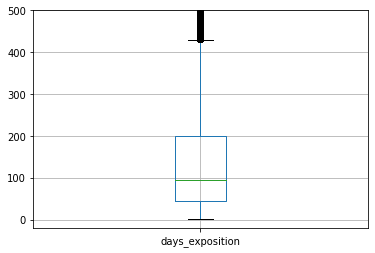

In [42]:
import matplotlib.pyplot as plt
plt.ylim(-20, 500)
data.boxplot(['days_exposition'])

 Среднее значение и медиану посмотрим, вызвав метод describe().

In [43]:
data['days_exposition'].describe()

count    23277.000000
mean       169.479916
std        206.537478
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [44]:
print(data.groupby('days_exposition')['total_images'].count())

days_exposition
1         1
2         3
3       154
4       173
5       148
       ... 
1512      2
1513      1
1553      1
1572      1
1580      1
Name: total_images, Length: 1136, dtype: int64


 Из числового описания данных следует, что среднее время продажи занимает 169 дней.  Однако, медианное значение времени продажи составляет почти вдвое меньше среднего - 95  дней. Такая разница образовалась за счет того, что минимальное время составило 1 день, максимальное - 1580 дней. Очень быстрые и необычно долгие продажи можно увидеть за пределами межквартильного размаха - это  менее 45 дней и более 1000 дней соответственно. 

 Из группировки данных видно, что явно выбивающимися являются объявления, которые "провисели" 1-2 дня. Необычно долгие продажи посмотрим на гистограмме. Значения на гистограмме практически сходят на нет после значения 1000 по оси x из чего можно сделать вывод, что к необычно долгим можно отнести сделки, которые совершены после 3-х лет со дня размещения объявления. 

 Нормальное по длительности время продажи можно увидеть на диаграмме размаха, "ящик" которой ограничен временными рамками примерно от 40 до чуть менее 200 дней. Таким образом, можно сделать вывод, что обычно сделки по продаже недвижимости занимают от 1,5 месяцев до чуть более полугода. От аномально выбивающихся значений избавимся задав условие 2 < days_exposition < 1000 и еще раз посмотрим на исходный датафрейм методом info().    

In [45]:
data = data.query('2 < days_exposition < 1000')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22997 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              22997 non-null  int64         
 1   last_price                22997 non-null  float64       
 2   total_area                22997 non-null  float64       
 3   first_day_exposition      22997 non-null  datetime64[ns]
 4   rooms                     22997 non-null  int64         
 5   ceiling_height            22997 non-null  float64       
 6   floors_total              22917 non-null  float64       
 7   living_area               21146 non-null  float64       
 8   floor                     22997 non-null  int64         
 9   is_apartment              2701 non-null   object        
 10  studio                    22997 non-null  bool          
 11  open_plan                 22997 non-null  bool          
 12  kitchen_area      

 Теперь исследуем зависимость цены недвижимости от таких факторов как площадь, число комнат, удаленность от центра, этаж, дата размещения объявления о продаже. 

 Для изучения зависимости цены от площади создадим таблицу методом pivot_table, в параметрах которого зададим данные из 'total_area' и 'last_price'. На основе таблицы методом plot() создадим график. Методом corr() рассчитаем корреляцию.  

0.7254952254586008

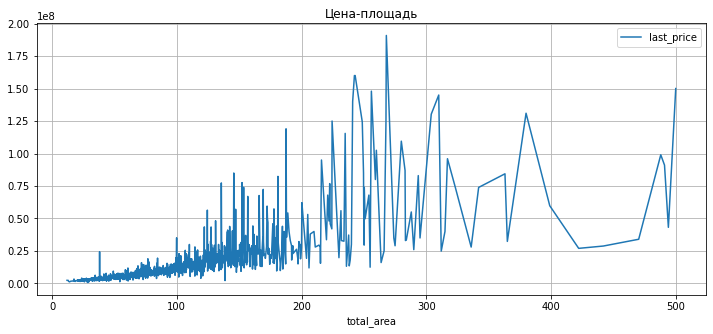

In [46]:
data.pivot_table(index='total_area', values='last_price'
                ).plot(grid=True, title='Цена-площадь', figsize=(12, 5))
data['total_area'].corr(data['last_price'])

 На графике видна прямая зависимость между площщадью квартиры и ее ценой. Чем больше площадь - тем выше цена.Об этом же свидетельствует довольно высокий коэффициент положительной корелляции (0.72).

<AxesSubplot:title={'center':'Цена-площадь'}, xlabel='total_area', ylabel='last_price'>

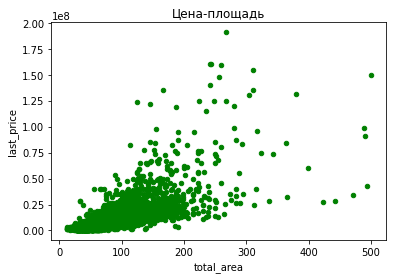

In [47]:
data.plot(x='total_area', y='last_price', title='Цена-площадь',color = 'green', kind='scatter')

 Аналогичные методы применим для исследования зависимости цены от числа комнат, удаленности от центра и этажности.

<AxesSubplot:title={'center':'Цена-комнаты'}, xlabel='rooms', ylabel='last_price'>

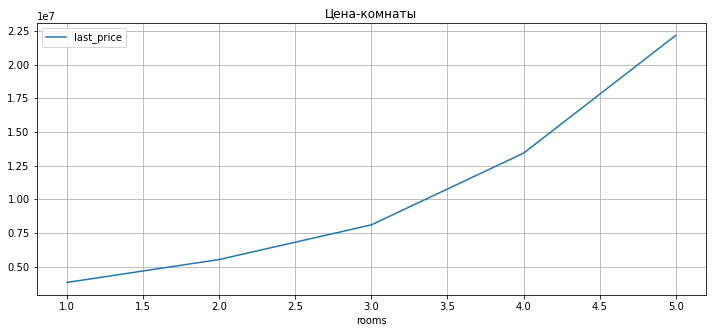

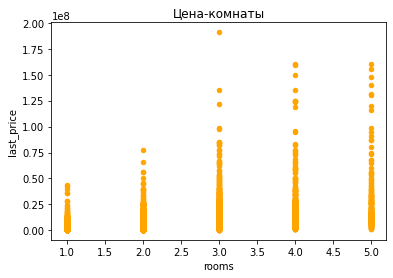

In [48]:
data.pivot_table(index='rooms', values='last_price'
                ).plot(grid=True, title='Цена-комнаты', figsize=(12, 5))
data['last_price'].corr(data['rooms'])
data.plot(x='rooms', y='last_price', title='Цена-комнаты',color = 'orange', kind='scatter')

 Между количеством комнат и ценой квартир также высокая положительная корреляция (0.39). В сегменте от 1 до 3-х комнат цена растет вдвое медленней, чем от 3-х до 5.

 График зависимости цены жилья от удаленности от центра в соответствии с условием задачи построим на одном из дальнейших этапов исследования. На этой стадии выведем процент корреляции. 

In [49]:
data['square_price'].corr(data['cityCenters_nearest'])

-0.263782826703573

 Между стоимостью квадратного метра и расстоянием до центральной части есть обратная зависимость. Чем дальше от центра - тем дешевле квартиры. Однако, данный процент нельзя назвать очень высоким.

 Для изучения зависимости цены недвижимости от этажа создадим два графика: с данными из 'floor','floor_group' и 'square_price'. 

<AxesSubplot:title={'center':'Цена-этаж-группы'}, xlabel='floor_group'>

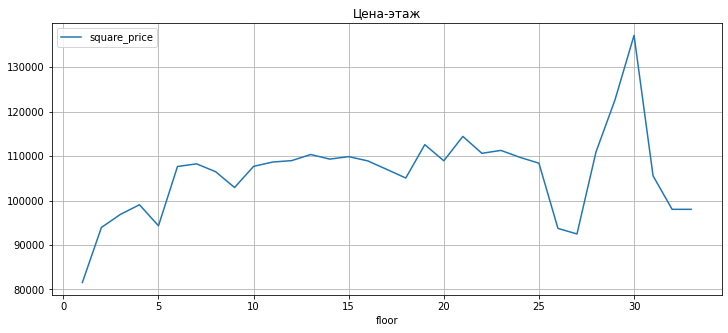

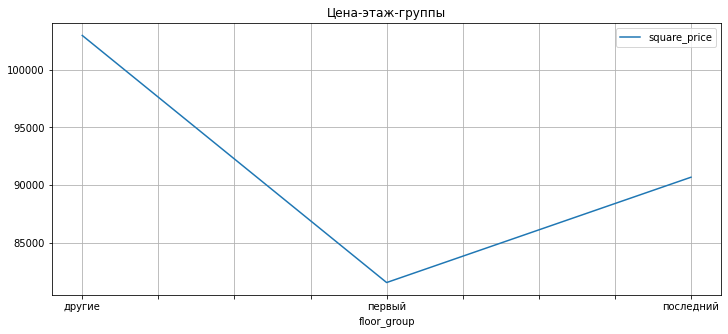

In [50]:
data.pivot_table(index='floor', values='square_price'
                ).plot(grid=True, title='Цена-этаж', figsize=(12, 5))
data.pivot_table(index='floor_group', values='square_price'
                ).plot(grid=True, title='Цена-этаж-группы', figsize=(12, 5))

На графиках  видно, что наименьшая цена за квадратный метр жилья у недвижимости на первых этажах. Несмотря на то, что на графике 'Цена-этаж' имеется ценовой пик в районе 30 этажа, это не означает, что чем выше квартира, тем дороже. На последних этажах ее  цена поышается, но не до максимума, а до средней величины. Наибольшую цену имеют квартиры на этажах, отнесенных к категории "другие". А ценовой пик на 30 этаже может иметь место в пентхаусах, которые нельзя отнести к среднестатистическому жилью. 

 Зависимость цены квадратного метра отдаты подачи объявления сначала посмотрим по показателю корреляции.

In [51]:
print(data['square_price'].corr(data['weekday']))
print(data['square_price'].corr(data['month']))
print(data['square_price'].corr(data['year']))

-0.0070621205880587665
-0.0044662634654452854
0.01961241563846331


 Построим столбчатые диаграммы методом plot.bar(). Для начала применим метод groupby() к столбцу 'square_price', данные которого сгруппируем по данным столбцов 'weekday', 'month', 'year'. Результаты группировки сохраним в переменных a, b, c соответственно. 

<AxesSubplot:title={'center':'Цена по дням недели'}, xlabel='weekday'>

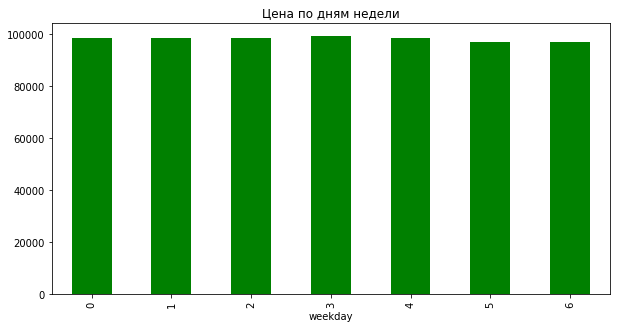

In [52]:
a = data.groupby('weekday')['square_price'].mean()
a.plot.bar(x='weekday', y='square_price', title='Цена по дням недели', color = 'green', figsize =(10, 5))

<AxesSubplot:title={'center':'Цена по месяцам'}, xlabel='month'>

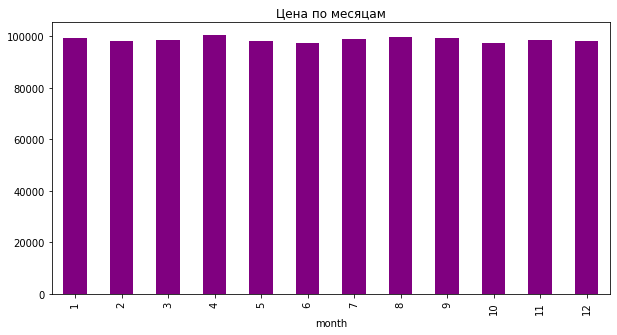

In [53]:
b= data.groupby('month')['square_price'].mean()
b.plot.bar(x='month', y='square_price', title='Цена по месяцам', color = 'purple', figsize =(10, 5))

<AxesSubplot:title={'center':'Цена по годам'}, xlabel='year'>

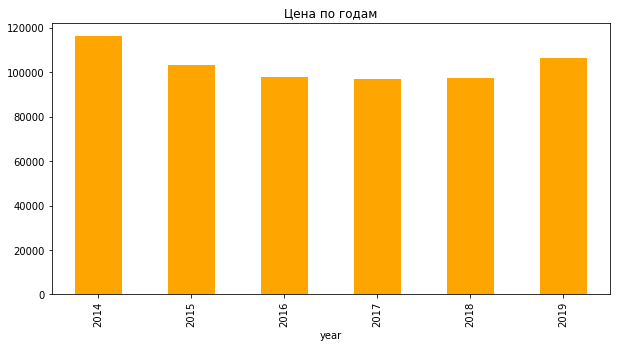

In [54]:
c= data.groupby('year')['square_price'].mean()
c.plot.bar(x='year', y='square_price',title='Цена по годам', color = 'orange',figsize =(10, 5))

Между днем недели, месяцем, годом размещения объявления и ценой зависимости практически нет. Определенный интерес вызывает динамика предложений о продажи недвижимости в течение года. Для этого параметра построим гистограмму.  

<AxesSubplot:>

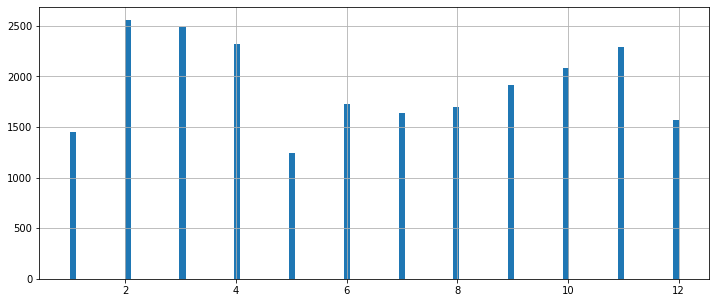

In [55]:
data['month'].hist(bins=100, figsize=(12, 5))

 На гистограмме видно, что наименьшее и наибольшее количество предложений о продаже недвижимости примерно соответствуют общей деловой активности в течение года. В предпраздничные и праздничные периоды с длинными выходными днями (декабрь, январь, май) объявлений значительно меньше, чем в начальный период деловой активности (февраль) или с началом академического года (сентябрь). В летний период - рынок предложений средне-стабилен. 

По условию нам необходимо выбрать 10 населённых пунктов с наибольшим числом объявлений, посчитать среднюю цену квадратного метра в этих населённых пунктах, выделить населённые пункты с самой высокой и низкой стоимостью жилья. 


  Чтобы найти 10 населенных пунктов с наибольшим числом объявлений и посчитать среднюю цену квадратного метра в этих населенных пунктах создадим датафрейм, в котором будут объединены два указанных параметра. Для этого методом pivot_table создадим таблицу m, в которой в качестве индекса возьмем данные из столбца 'locality_name', сгруппируем их по данным столбца 'square_price', к которому применим агрегирующий метод, позволяющий вычислять среднюю величину 'mean'. Проверим путем выведения первых 5 строк на экран.

In [56]:
m=data.pivot_table(index='locality_name', values='square_price',aggfunc='mean')
print(m.head())

               square_price
locality_name              
unknown        94309.591837
Бокситогорск   17551.062500
Волосово       40182.888889
Волхов         35054.681818
Всеволожск     68663.386598



  Второй датафрейм также создадим методом pivot_table, в котором в качестве индекса также возьмем данные из столбца 'locality_name', сгруппируем их по данным столбца 'total_images', к которому применим агрегирующий метод 'count'. Назовем таблицу l. Проверим путем выведения первых 5 строк на экран.

In [57]:
l = data.pivot_table(index= 'locality_name', values='total_images', aggfunc='count')
print(l.head())

               total_images
locality_name              
unknown                  49
Бокситогорск             16
Волосово                 36
Волхов                  110
Всеволожск              388



  Теперь методом join() объединим созданные таблицы по значениям столбца 'locality_name', методом sort_values по столбцу 'total_images' найдем 10 населенных пунктов с наибольшим количеством объявлений. Объединенному датафрейму присвоим наименование top_name_images  

In [58]:
top_name_images = (m.join(l, on='locality_name')
                  ).sort_values(by='total_images', ascending=False).head(10)
print(top_name_images)

                    square_price  total_images
locality_name                                 
Санкт-Петербург    113910.482627         15196
посёлок Мурино      85186.137014           489
посёлок Шушары      78340.636574           432
Всеволожск          68663.386598           388
Пушкин             103326.158774           359
Колпино             75279.280597           335
посёлок Парголово   90374.937695           321
Гатчина             68757.225490           306
деревня Кудрово     92238.571942           278
Выборг              58120.847458           236


  Для наглядности построим диаграммы, которых в качестве параметра по оси  y передадим значения столбцов 'total_images' и 'square_price'.

<AxesSubplot:title={'center':'Цена кв.м.(top 10)'}, xlabel='locality_name'>

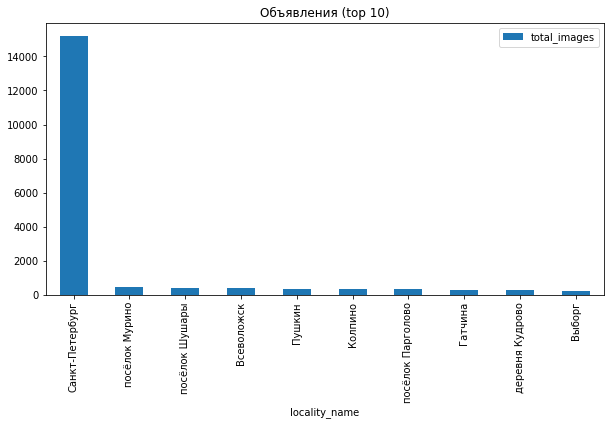

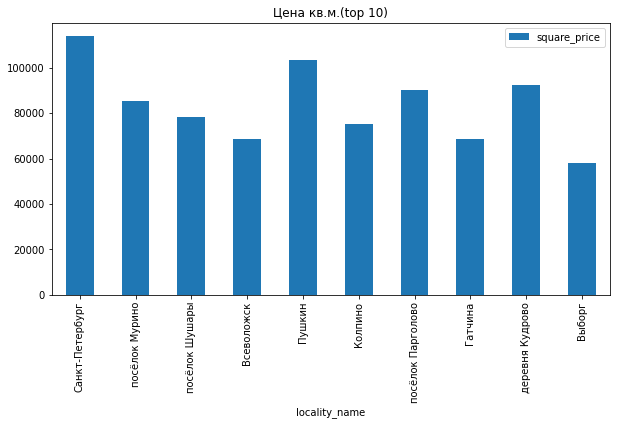

In [59]:
top_name_images.plot(kind='bar', y='total_images', title='Объявления (top 10)', figsize =(10, 5))
top_name_images.plot(kind='bar', y='square_price', title='Цена кв.м.(top 10)', figsize =(10, 5))

 Методом query(), примененным к датафрейму m находим населенные пункты с самой высокой и самой низкой средней стоимостью квадратного метра жилья.

In [60]:
m.query('square_price == square_price.max()')

,square_price
locality_name,
посёлок Лисий Нос,168706.0


In [61]:
m.query('square_price == square_price.min()')

,square_price
locality_name,
деревня Старополье,11206.0


 Самую большую среднюю стоимость имеет квадратный метр жилья  в поселке Лисий нос, который находится на северном берегу Финского залива и является внутригородским муниципальным образованием в составе Приморского района Санкт-Петербурга. Самая низкая стоимость в деревне Ставрополье.

### Вывод:

 Для установления зависимости цены на недвижимость от параметров 'total_area','square_price','rooms','ceiling_height','days_exposition' мы удалили редкие и выбивающиеся значения из исходного датафрейма.  

  Обычно сделки по продаже недвижимости занимают от 1,5 месяцев до чуть более полугода. Активность продавцов недвижимости примерно соответствуют общей деловой активности в течение года - периоды спада в декабре, январе, мае и подъема в феврале и сентябре. Между днем недели, месяцем, годом размещения объявления ценовой зависимости практически нет.Между площадью квартиры, количеством комнат и ее ценой имеется прямая пропорциональная зависимость. Чем больше площадь и количество комнат - тем выше цена. Зависимость цены квадратного метра жилья от этажности не такая однозначная.  Наименьшую цену дают  за жилье на первых этажах. В средней ценовой категории жилье на последних этажах.   Наибольшую цену имеют квартиры на этажах,не являющихся ни первыми ни последними. Самую большую среднюю стоимость имеет квадратный метр жилья  в поселке Лисий нос Приморского района Санкт-Петербурга. Самая низкая стоимость в деревне Ставрополье.

## Расстояние до центра

 В соответствии с условием задачи изучим ценовую зависимость квартир от расстояния до центральной части. 

 В  исходном датафрейме создаем столбец 'cityCenters_nearest_km' в котором сохраняем расстояние до центра в километрах. Данные для этого столбца получаем путем деления значений столбца 'cityCenters_nearest' на 1000 с последующим округлением методом round() до целых значений. Также посмотрим максимальное расстояние от центра, на котором предлагается продажа недвижимости.

In [62]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000,0)

 Среднюю цену для каждого километра посчитаем путем деления разницы между средней максимальной и средней минимальной ценой  квадратного метра на максимальное значение расстояния до центра. Для этого создадим таблицу s методом pivot_table, в качестве аргументов которой передадим данные из столбцов 'cityCenters_nearest_km' и 'square_price' исходного датафрейма. 

In [63]:
s = data.pivot_table(index='cityCenters_nearest_km', values='square_price') 

In [64]:
print('В среднем цена квадратного метра жилья на каждый километр к центру повышается на',
      int((s['square_price'].max()-s['square_price'].min())/len(s)),'руб.')

В среднем цена квадратного метра жилья на каждый километр к центру повышается на 2819 руб.


 Максимальное расстояние недвижимости, которая предлагается к продаже, от центра составляет 66 км. В среднем стоимость квадратного метра жилья по мере приближения к центру с каждым километром растет примерно на 2900 рублей.

 Зависимость цены квадратного метра жилья от расстояния до центра можно посмотреть на графике, построенном путем применения метода plot() к датафрейму, который мы получили с помощью pivot_table, где в качестве индекса (она же ось х) указали данные столбца 'cityCenters_nearest_km', данные для оси у передали из столбца 'square_price'. По умолчанию группировка произошла по среднему значению.

<AxesSubplot:title={'center':'Цена-центр'}, xlabel='cityCenters_nearest_km'>

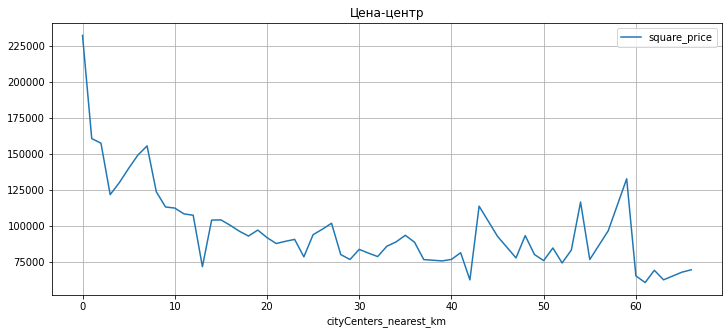

In [65]:
data.pivot_table(index='cityCenters_nearest_km', values='square_price'
                ).plot(grid=True, title ='Цена-центр',figsize=(12, 5))

 На графике видна обратная зависимость цены квадратного метра жилья от расстояния до центра. Чем ближе к центру, тем дороже жилье. На расстоянии нулевого километра от центра средняя стоимость квадратного метра составляет 230000 рублей и стремительно снижается (до 125000, почти в два раза) примерно до 3-го километра. В этих пределах и можно определить центральную зону. В районе 7-го километра резкий всплеск стоимости, но не до пиковой величины. Возможно этот подъем связан с престижностью района. После этого снижение стоимости квадратного метра жилья не такое интенсивное. Примерно до 12 километра от центра можно выделить зону второй ценовой категории (150000 - 100000 рублей). И после этого до самого последнего населенного пункта стоимость жилья находится в пределах 100000-75000 рублей с отдельными всплесками и падениями, вызванными скорее всего состоянием конкретной недвижимости. Также можно посмотреть процент корреляции Пирсона, применив метод corr().  

In [66]:
print(data['cityCenters_nearest_km'].corr(data['square_price']))

-0.26194242113365096


 Процент корелляции также свидетельствует об обратной зависимости параметров cityCenters_nearest_km и square_price. однако назвать его высоким нельзя.

 Отдельно строим график зависимости цены квадратного метра жилья от расстояния до центра по Санкт-Петербургу, передав методу plot() теже данные, что и в общем графике, выделив методом query() северную столицу, высчитываем процент корреляции.Переменную по Санкт-Петербургу назовем Sp.

In [67]:
Sp = data.query('locality_name == "Санкт-Петербург"')

<AxesSubplot:title={'center':'Санкт-Петербург (цена-центр)'}, xlabel='cityCenters_nearest_km'>

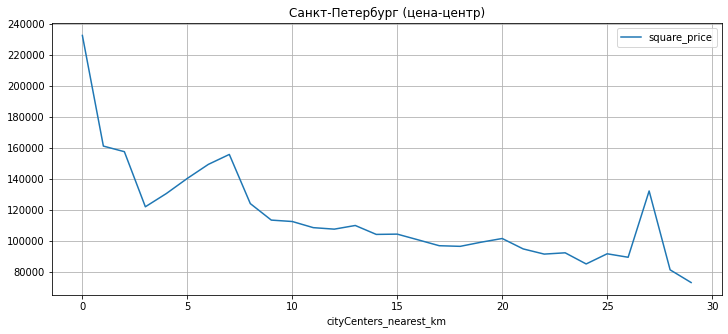

In [68]:
Sp.pivot_table(index='cityCenters_nearest_km', values='square_price'
              ).plot(grid=True,title ='Санкт-Петербург (цена-центр)', figsize=(12, 5))

In [69]:
print(Sp['cityCenters_nearest_km'].corr(Sp['square_price']))

-0.3384963986602457


 Динамика цены в зависимости от расстояния до центра по г.Санкт-Петербургу примерно соответствует общей, но отрицательная корреляция выше.

Для анализа рынка недвижимости в центре создадим отдельную таблицу Centers путем выделения из исходного датафрейма по признаку cityCenters_nearest_km <= 7.0 методом query().Также посмотрим какие населенные пункты в него входят.

In [70]:
Centers = data.query('cityCenters_nearest_km <= 7.0')
print(Centers['locality_name'].value_counts())

Санкт-Петербург    3262
unknown              16
Name: locality_name, dtype: int64


 Выборка по населенным пунктам не изменилась, увеличилось общее количество предложений, относящихся к центральной части.В этой связи далее по тексту будут исправлены цифровые показатели (если они не повлияют на общие тенденции), либо сделаны иные выводы.

 Выборка показала, что центр находится в г. Санкт-Петербурге. По этому населенному пункту 3262 объявления. Остальные 16 объявлений - пропуски в данных, поименованные нами как unknown, также скорее всего охватываются этой территорией. Для изучения площади, цены, числа комнат, высоты потолков построим гистограммы, применим числовые описания.

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'square_price'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

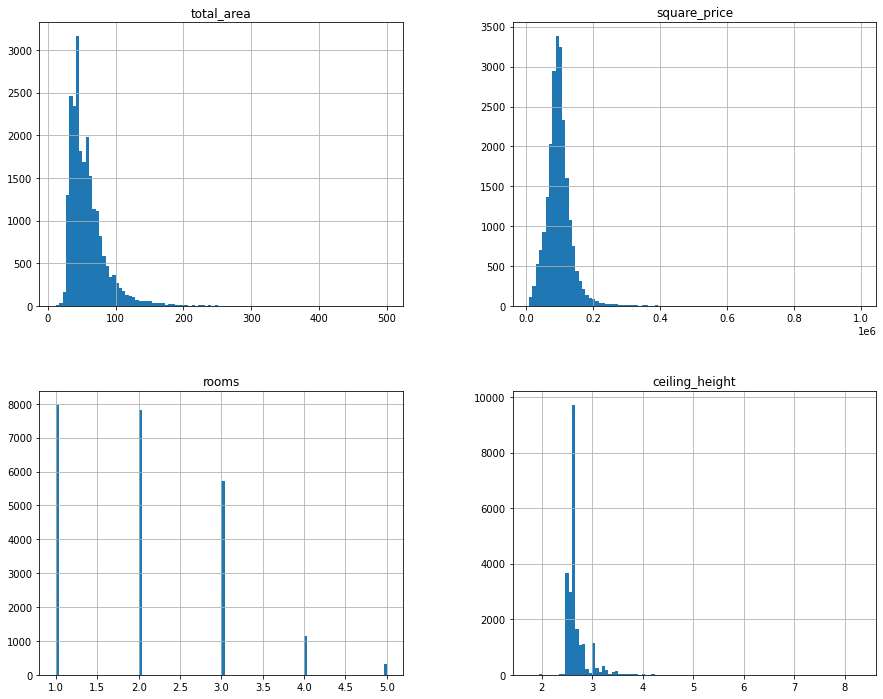

In [71]:
Centers_hist = data[['total_area','square_price','rooms','ceiling_height']]
Centers_hist.hist(bins=100, figsize=(15, 12))  

In [72]:
Centers['total_area'].describe()

count    3278.000000
mean       86.103292
std        46.159428
min        12.000000
25%        55.800000
50%        76.000000
75%       104.000000
max       500.000000
Name: total_area, dtype: float64

 Числовое описание 'total_area' квартир, которые предлагались к продаже, показывает, что минимальная площадь квартиры составляет 12 кв.м., максимальная - 500 кв.м. Средняя и медианная площади не сильно отличаются и составляют 86 и 76 кв.м. соответственно. Площать большинства квартир варьирует в пределах 55-104 кв.м.

In [73]:
round(Centers['last_price'].describe())

count         3278.0
mean      13232521.0
std       15200662.0
min        1600000.0
25%        6500000.0
50%        8900000.0
75%       13500000.0
max      190870000.0
Name: last_price, dtype: float64

 Числовое описание 'last_price' показывает, что цена большинства квартир в центральной части составляет 6.5 - 13.5 млн.руб. минимально возможная цена - 190 млн.870 тыс. руб. Онако, средняя цена почти в полтора раза выше медианной (13 млн.руб. и 8 млн.900 тыс.руб. соответственно).  

In [74]:
round(Centers['square_price'].describe())

count      3278.0
mean     143145.0
std       77782.0
min       15345.0
25%      100000.0
50%      123944.0
75%      155479.0
max      995983.0
Name: square_price, dtype: float64

 Из числового описания 'square_price' видно, что цена квадратного метра большинства квартир варьирует в пределах 100-155 тыс.руб. Минимум составляет чуть более 15 тыс.руб., максимум - почти 1 млн.руб. 

In [75]:
Centers['rooms'].describe()

count    3278.000000
mean        2.647651
std         1.096230
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

 Квартиры центральной части Санкт-Петербурга, в основном, 2-3 комнатные. Максимальное количество комнат в объявлениях о продаже - 5, минимальное - 1. 

In [76]:
Centers['ceiling_height'].describe()

count    3278.000000
mean        2.924881
std         0.359398
min         2.400000
25%         2.650000
50%         2.800000
75%         3.100000
max         6.000000
Name: ceiling_height, dtype: float64

В среднем, высота потолков в изучаемом сегменте составляет около 2.9 метра (это близко к медианному значению 2.8 метра). В большинстве квартир она в пределах 2,65-3.1 метра. Имеются предложения о продаже квартир с потолками  до 6 метров.

 Для изучения зависимости цены квартиры от количества комнат,этажности, удалённости от центра, даты размещения объявления построим графики, выведем показатель корреляции, применим группировку отдельных данных. 

0.3448680803493053


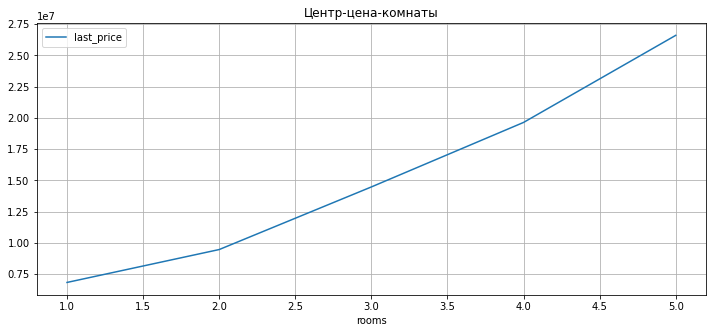

In [77]:
Centers.pivot_table(index='rooms', values='last_price'
                   ).plot(grid=True, title='Центр-цена-комнаты', figsize=(12, 5))
print(Centers['last_price'].corr(Centers['rooms']))

 О наличии прямой пропорциональной зависимости в центре Санкт-Петербурга между числом комнат и ценой квартиры свидетельствуют график, показатель корелляции и здравый смысл. Эти показатели соответствуют общим тенденциям. 

0.12161589830431896


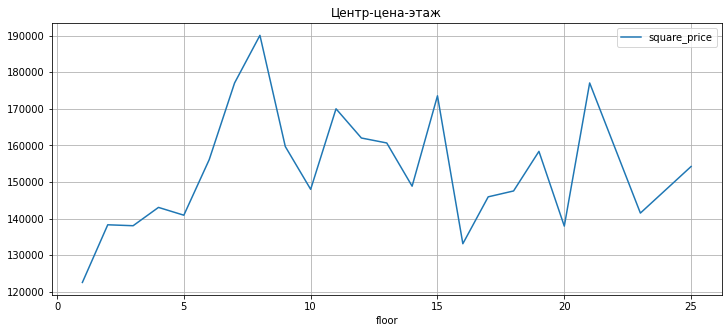

In [78]:
Centers.pivot_table(index='floor', values='square_price'
                   ).plot(grid=True, title='Центр-цена-этаж', figsize=(12, 5))
print(Centers['floor'].corr(Centers['square_price']))

In [79]:
print(Centers.groupby('floor_group')['square_price'].median())

floor_group
другие       128366
первый       107500
последний    116363
Name: square_price, dtype: int64


In [80]:
print(Centers.groupby('floor')['square_price'].mean())

floor
1     122529.638356
2     138292.334928
3     138035.929508
4     143043.393939
5     140912.609302
6     156095.718447
7     177055.500000
8     190077.363636
9     159686.683544
10    147981.254545
11    170003.440000
12    162015.388889
13    160658.000000
14    148843.368421
15    173553.500000
16    133115.555556
17    145931.833333
18    147540.833333
19    158362.454545
20    137931.000000
21    177064.333333
23    141491.500000
25    154231.000000
Name: square_price, dtype: float64


 В объявлениях о продаже квартир в центральной части присутствуют предложения, органиченные 25 этажами.Скорее всего это связано с ограничением строительства по этажности. Средняя цена квадратного метра жилья имеет минимальные размеры на первых этажах - примерно 120 тыс.руб. Далее цена растет постепенно до 6 этажа примерно до 160 тыс.руб. После 6 до 8 этажа идет резкий рост цены примерно до 190 тыс.руб. Скорее всего это пентхаусы. Вместе с тем, стоимость жилья на последних этажах не является максимальной. Она ниже, чем на тех, которые вошли в группировку "другие". Эта тенденция характерна и для всех предложений, не только для центральной части. Однако, в целом, в центре квартиры дороже.     

0.0017912441292072387


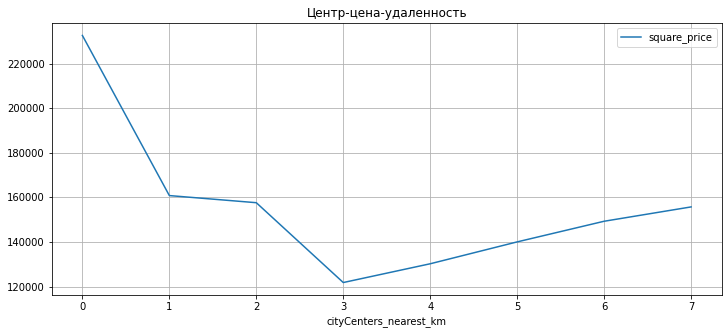

In [81]:
Centers.pivot_table(index='cityCenters_nearest_km', values='square_price'
                   ).plot(grid=True, title='Центр-цена-удаленность', figsize=(12, 5))
print(Centers['cityCenters_nearest_km'].corr(Centers['square_price']))

 Между средней ценой квадратного метра жилья в центре и удаленностью от него, как и в общем массиве предложений, имеется обратная пропорциональная зависимость: чем дальше от центра, тем дешевле. Значительная разница в цене (с каждой сотней метров) в пределах 1-го километра, где стоимость с 230 тыс.руб. понижается до 160 тыс.руб. Относительная стабильность - от 1 до 2 километра и резкое снижение со 2 до 3 километра. 

 Зависимость цены квадратного метра отдаты подачи объявления сначала посмотрим по показателю корелляции.

In [82]:
print(Centers['square_price'].corr(Centers['weekday']))
print(Centers['square_price'].corr(Centers['month']))
print(Centers['square_price'].corr(Centers['year']))

0.027690381686959236
-0.01918109876399154
0.014751716484480539


 Построим столбчатые диаграммы методом plot.bar(). Для начала применим метод groupby() к столбцу 'square_price' датафрейма Centers, данные которого сгруппируем по данным столбцов 'weekday', 'month', 'year'. Результаты группировки сохраним в переменных d, e, f соответственно. 

<AxesSubplot:title={'center':'Цена по дням недели - Центр'}, xlabel='weekday'>

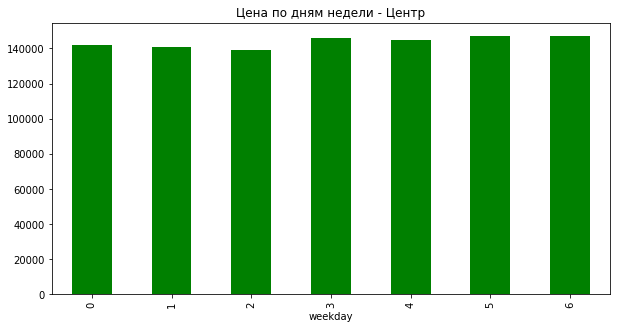

In [83]:
d = Centers.groupby('weekday')['square_price'].mean()
d.plot.bar(x='weekday', y='square_price', title='Цена по дням недели - Центр', color = 'green', figsize =(10, 5))

<AxesSubplot:title={'center':'Цена по месяцам-Центр'}, xlabel='month'>

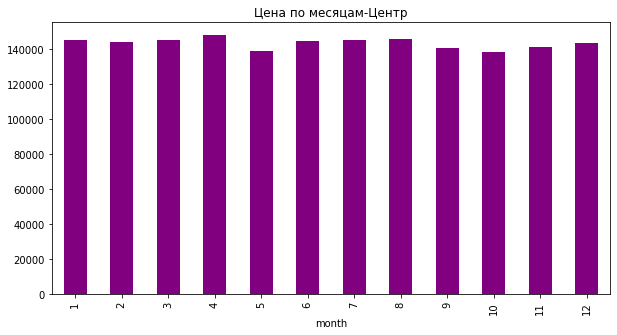

In [84]:
e = Centers.groupby('month')['square_price'].mean()
e.plot.bar(x='month', y='square_price', title='Цена по месяцам-Центр', color = 'purple', figsize =(10, 5))

<AxesSubplot:title={'center':'Цена по годам-Центр'}, xlabel='year'>

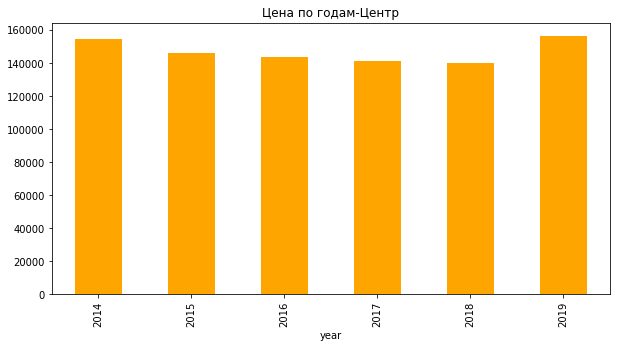

In [85]:
f = Centers.groupby('year')['square_price'].mean()
f.plot.bar(x='year', y='square_price',title='Цена по годам-Центр', color = 'orange',figsize =(10, 5))

 Между днем недели, меяцем, годом подачи объявления и ценой зависимости практически нет, поскольку сделки происходят, как мы установили в период от нескольких дней до нескольких лет. Больший интерес в плане исследования рынка недвижимости представляет период активности продавцов недвижимости в течение года. Для этого построим гистограмму.

<AxesSubplot:>

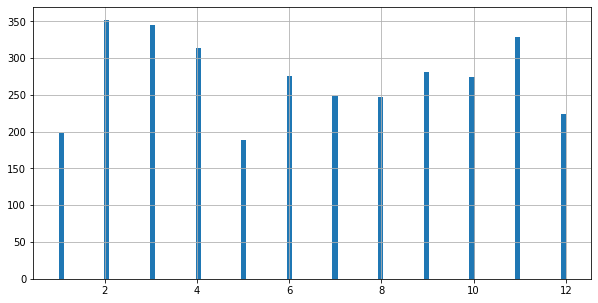

In [86]:
Centers['month'].hist(bins=100, figsize=(10, 5))

 Период активности продавцов недвижимости примерно соответствует общему периоду деловой активности. В декабре-январе и мае - снижение, феврале, ноябре - пик. 

### Вывод:

 Изучением зависимости цены квартиры от расстояния до центральной части установлено следующее. Максимальное расстояние недвижимости, которая предлагается к продаже, от центра составляет 66 км. Имеется обратная зависимость цены квадратного метра жилья от расстояния до центра. Чем ближе к центру, тем дороже жилье. Непосредственно в центральной части средняя стоимость квадратного метра составляет 230000 рублей и стремительно снижается (до 150000, почти на  треть) примерно до 7-го километра. В этих пределах и можно определить центральную зону.  Примерно до 12 километра от центра можно выделить зону второй ценовой категории (150000 - 100000 рублей). И после этого до самого последнего населенного пункта стоимость жилья находится в пределах 100000-75000 рублей. В среднем стоимость квадратного метра жилья по мере приближения к центру с каждым километром растет примерно на 3000 рублей. Однако, процент корреляции расстояния до центра и цены квадратного метра нельзя назвать высоким по сравнению с такими параметрами как площадь, количество комнат, этаж. 

 Выборка показала, что центр находится в г. Санкт-Петербурге. По этому населенному пункту 3278 объявлений. Динамика цены в зависимости от расстояния до центра по г.Санкт-Петербургу примерно соответствует общей, но отрицательная корреляция выше. Однако, она не так сильно влияет на ценообразование жилья. Гораздо большая зависимость цены квартиры от общей площади и количества комнат (прямая пропорциональная), этажности (самые дешевые квартиры на первых этажах, самые дорогие - не на первом и последнем, средняя ценовая категория - последние этажи). Время размещения объявления на цену квартиры практически не влияет. Приведенная динамика также соответствует общим тенденциям. 

## Общий вывод

   Мы провели исследование по установлению параметров зависимости рыночной стоимости недвижимости  на основе данных сервиса Яндекc Недвижимость (архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).    

 Для работы с данными провели предварительну обработку.  В столбцах 'ceiling_height', 'cityCenters_nearest', 'days_exposition','airports_nearest' пропуски заменили  медианными значениями. В столбцах  'balcony', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' пропуски заменены на нулевые значения,в 'locality_name' - на 'unknown'. В столбцах 'first_day_exposition' и 'day_exposition' типы данных изменили на datetime и int соответственно. В исходный датафрейм добавлены столбцы 'square_price', 'ratio_living_total_area','ratio_kitchen_total_area','floor_group', 'weekday', 'month','year','cityCenters_nearest_km'. По столбцам 'total_area','square_price','rooms','ceiling_height','days_exposition' из исходного датафрейма удалены редкие и выбивающиеся значения. Для анализа количество данных с 23699 сократилось до 22997, что не превысило 5% и явяляется нормой.   

  Обычно сделки по продаже недвижимости занимают от 1,5 месяцев до чуть более полугода. Активность продавцов недвижимости примерно соответствуют общей деловой активности в течение года - периоды спада в декабре, январе, мае и подъема в феврале и сентябре. Между днем недели, месяцем, годом размещения объявления ценовой зависимости практически нет. Между площадью квартиры, количеством комнат и ее ценой имеется прямая пропорциональная зависимость. Чем больше площадь и количество комнат - тем выше цена. Имеется зависимость цены квадратного метра жилья от этажности. Наименьшую цену дают за жилье на первых этажах. В средней ценовой категории жилье на последних этажах. Наибольшую цену имеют квартиры на этажах,не являющихся ни первыми ни последними. Самую большую среднюю стоимость (168706 руб.) имеет квадратный метр жилья  в поселке Лисий нос Приморского района Санкт-Петербурга. Самая низкая стоимость (11206 руб.) в деревне Ставрополье.

 Максимальное расстояние от центра до недвижимости, которая предлагается к продаже, составляет 66 км. Имеется обратная зависимость цены квадратного метра жилья от расстояния до центра. Чем ближе к центру, тем дороже жилье. Центральнаую зону можно ограничить примерно в радиусе 7-ми километров. В среднем стоимость квадратного метра жилья по мере приближения к центру с каждым километром растет примерно на 3000 рублей. Однако, процент корреляции расстояния до центра и цены квадратного метра (-0.26) нельзя назвать высоким по сравнению с такими параметрами как площадь, количество комнат, этаж. 

 Непосредственно центр находится в г. Санкт-Петербурге. По этому населенному пункту размещено и наибольшее количество объявлений о продаже (более 15000, в том числе более 3000 по территории, непосредственно образующей центр). Динамика цены в зависимости от расстояния до центра по г.Санкт-Петербургу соответствует общей, но отрицательная корреляция больше ( -0.34). Влияние на цену таких параметров как площадь квартиры, количество комнат, этаж, время размещения объявлений в центральной части соответствует общим тенденциям. 

 На основании проведенного анализа для построения автоматизированной системы по определению рыночной стоимости жилья можно рекомендовать следующее. Между площадью квартир, количеством комнат необходимо установить прямую пропорциональную зависимость с процентами корреляции около  0.7 и 0.35 соответственно. Зависимость цены от этажа должна быть следующей: на первых этажах - наименьшая цена, на последних - средняя ценовая категория, на этажах, не являющихся ни первыми ни последними - наиболее высокая цена. В зависимости от расстояния до центра цена за квадратный метр недвижимости должна повышаться примерно на 3000 руб. Также следует учитывать,что в зависимости от населенного пункта минимальная средняя цена квадратного метра жилья чуть более 11000 руб. (деревня Ставрополье), максимальная составляет 168700 рублей (поселок Лисий нос Приморского района Санкт-Петербурга). Недвижимость, которая предлагается в 7 км. от центра можно считать расположенной в центральной части, динамика ценообразования которой хоть и соответствует общим тенденциям, но немного ниже. Наибольшее значение для этой недвижимости (несмотря на вычисление средней стоимости кв.м. на каждый километр до центра) все-таки имеет расстояние до центра. Время размещения объявлений (день недели, месяц, год) можно не учитывать, как не имеющие серьезного влияния на ценообразование жилья.    